# Statistical Moments

Sometimes mean and variance are nto enough to describe a distribution. When we calculate variance, we square the deviations around the mean. 

In the case of large deviations we do not knowo whether they are likely to be positive or negative.

This is where the skewness and symmetry of a distribution come ini . A distribution is symmetric if the parts on either side of the mean are mirror images of each other. 

A distribution which is not symmetric is called skewed. For instance a distribution can have many small posititve and a few large negative values (negatively skewed) or vice versa and still have a mean of 0.

Symmetric distribution has a skewness of 0. Positively skewed unimodel (one mode) distributionos have the property that mean > median >mode. Negative models are mean < median < mode

## Kurtosis

Kurtosis attempts to measure the shape of the deviation from the mean. Generally it describes how peaked a distribution is compared to the normal distribution.

#### Called mesokurtic

All normal distribution regardless of mean and variance have a kurtosis of 3. A leptokurtic distribution (kurtosis <3) is highly peaked and has fat taiils, while a platykurtic distribution (kurtosis <3) is broad.

Sometimes kurtosis in excess oof the normal distriibution is used, and this is the default in scipy. 

A leptokurtic distributino has more frequent large jumps away from the meann than a normal distributiono dooes while a platykurtic distributino has fewer.

## Normality Testing Using Jarque-Bera

This test is a common statistical test that compares whether sampledata has skewness and kurtosis similar to a normal distributino. 


In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

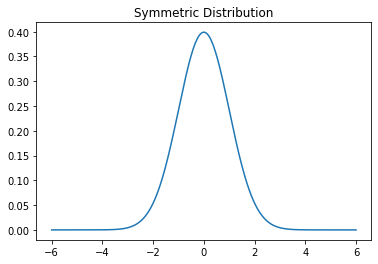

In [5]:
xs = np.linspace(-6,6,300)
normal = stats.norm.pdf(xs)
plt.title('Symmetric Distribution')
plt.plot(xs,normal);

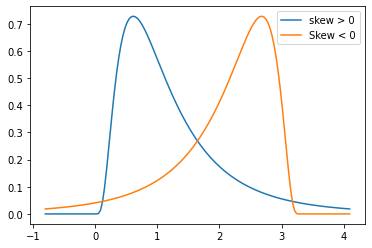

In [9]:
xs2 = np.linspace(stats.lognorm.ppf(0.01,.7,loc=-1),
                 stats.lognorm.ppf(0.99,.7, loc=-1),
                 150)
# Negatively skewed distribution
lognormal = stats.lognorm.pdf(xs2,.7)
plt.plot(xs2, lognormal,label='skew > 0')

# Positively skewed distribution
plt.plot(xs2, lognormal[::-1], label ='Skew < 0')
plt.legend();

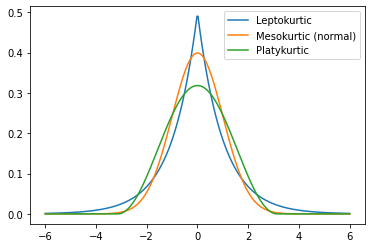

In [10]:
# Plot some example distributions

plt.plot(xs,stats.laplace.pdf(xs),label='Leptokurtic')
plt.plot(xs,normal,label='Mesokurtic (normal)')
plt.plot(xs,stats.cosine.pdf(xs),label='Platykurtic')
plt.legend();

In [14]:
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000

p_values = np.ndarray((N))

for i in range(N):
    X = np.random.normal(0,1,M);
    _, pvalue, _, _= jarque_bera(X)
    p_values[i] = pvalue
    
# count number of pvalues before our default 0.05
num_significant = len(p_values[p_values <0.05])

print(float(num_significant) / N)

0.048
